In [103]:
import sys
import glob

import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
print(mat_fonts)



# import seaborn as sns
# from palettable.colorbrewer.qualitative import Set3_12
# sns.set_palette(Set3_12.mpl_colors)
# current_palette = sns.color_palette()
# sns.palplot(current_palette)


{'Bodoni Ornaments', 'Sana', 'Kokonor', 'Charter', 'Oriya MN', 'Bodoni 72 Smallcaps', 'Big Caslon', 'Tahoma', 'STIXIntegralsUpSm', 'Al Nile', 'New Peninim MT', 'Avenir Next Condensed', 'Oriya Sangam MN', 'Futura', 'Bangla MN', 'System Font', 'Trebuchet MS', 'Baghdad', 'Avenir Next', '.Aqua Kana', 'DejaVu Sans', 'Muna', 'cmtt10', 'Mishafi Gold', 'Skia', 'Heiti TC', 'Damascus', 'cmss10', 'Telugu MN', 'Waseem', 'Songti SC', 'Hiragino Sans', 'Al Tarikh', 'PT Mono', 'Kohinoor Telugu', 'Brush Script MT', 'Helvetica', 'Khmer MN', 'Bradley Hand', 'cmr10', 'Arial Hebrew', 'Superclarendon', 'STIXIntegralsD', 'Wingdings 3', 'Shree Devanagari 714', 'Sinhala Sangam MN', 'Andale Mono', '.SF Compact Text', 'Copperplate', 'Wingdings 2', '.SF Compact Display', 'Diwan Thuluth', 'Wingdings', 'Arial Rounded MT Bold', 'Kohinoor Devanagari', 'cmsy10', 'Plantagenet Cherokee', 'Ayuthaya', 'Kannada Sangam MN', 'Gujarati Sangam MN', 'Snell Roundhand', 'PT Serif', 'Microsoft Sans Serif', 'Georgia', 'Kohinoor Ban

In [104]:
#规定中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

def plot_normal_distribution(series, ax, title, xlabel):
    mean = series.mean()
    std = series.std()
    min_v = series.min() - 2*std
    max_v = series.max() + 2*std
    x = np.arange(min_v, max_v, std/5) 
    #设定 y 轴，载入正态分布函数
    y = normfun(x, mean, std)
    ax.plot(x,y, color=color)
    ax.hist(series, bins=50, rwidth=0.9, density=True, label=tag, color=color)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability')
    ax.grid()
    ax.legend()

## pandas 读入，统计正太分布

1. pandas 读csv
2. query，取一列
3. 计算mean，std，按照正态分布曲线绘制

In [105]:
columns = ['top_tab', 'min_nav_num', 'c1', 'total', 'ratio1', 'c2', '头部样本/样本总数', 
           '头部样本平均点击数', '头部样本平均导航数', '样本平均点击数', '样本平均导航数']

tags = ['2_2_2_4', '4_3_2_1']
df_dict = dict()
for tag in tags:
    frames = list()
    base = '/Users/andyzhuang/tmp/city_2020030501_test_samp/city_2020030501_test_samp_{}_weight_*/stat_top_ratio_v3'.format(tag)
    for path in glob.glob(base):
        df1 = pd.read_csv(path, delimiter="\t", header=None, names=columns)
        df1.isnull().any()
#         df1.columns = columns
        frames.append(df1)

    df = pd.concat(frames)
    df_dict[tag] = df


############################## 【导航头部表】 【有导航流量的样本】的分布 ##############################
2_2_2_4 | 头部样本/样本总数 sample_size=50 μ=0.10277 σ=0.00251
4_3_2_1 | 头部样本/样本总数 sample_size=50 μ=0.10136 σ=0.00174


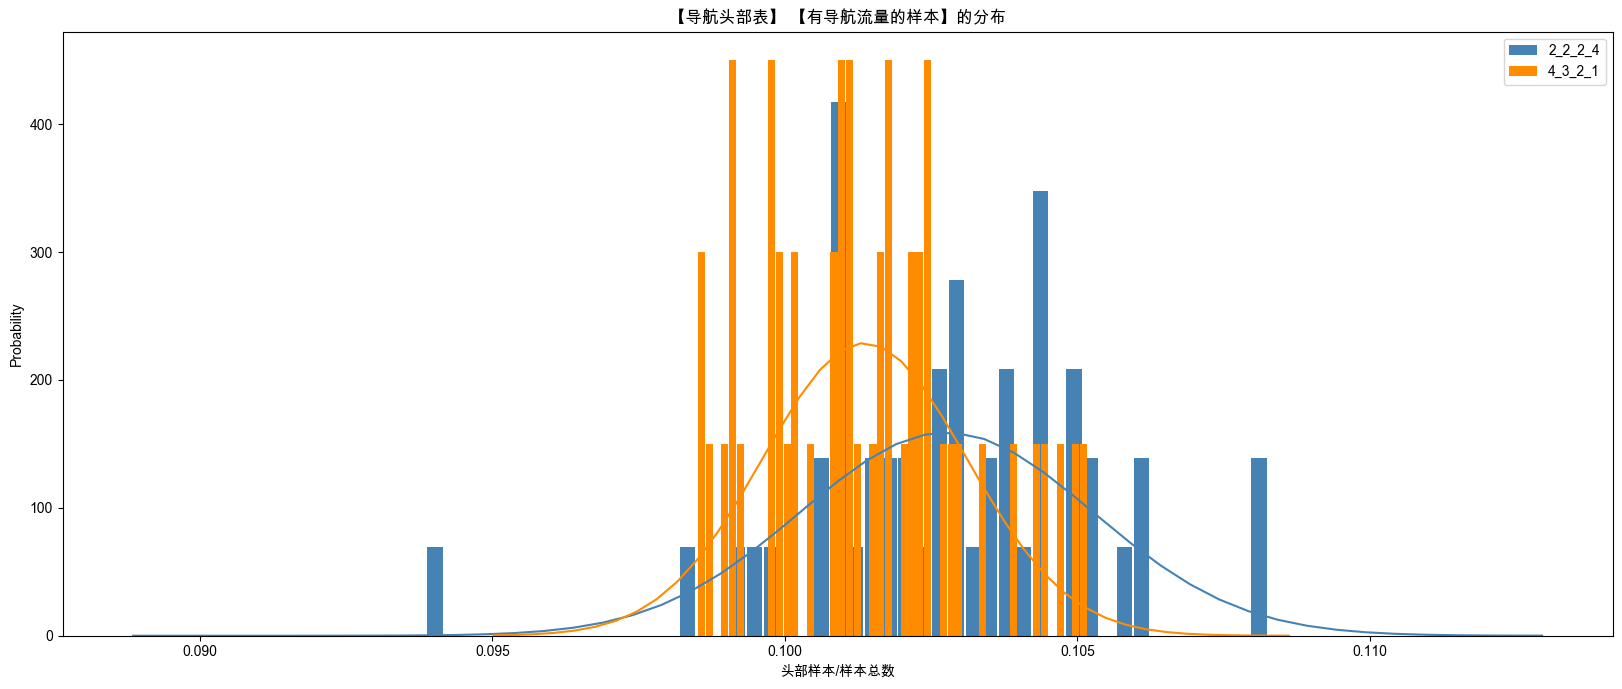

2_2_2_4 | 头部样本平均点击数 sample_size=50 μ=425.16713 σ=22.07476
4_3_2_1 | 头部样本平均点击数 sample_size=50 μ=413.43364 σ=18.61714


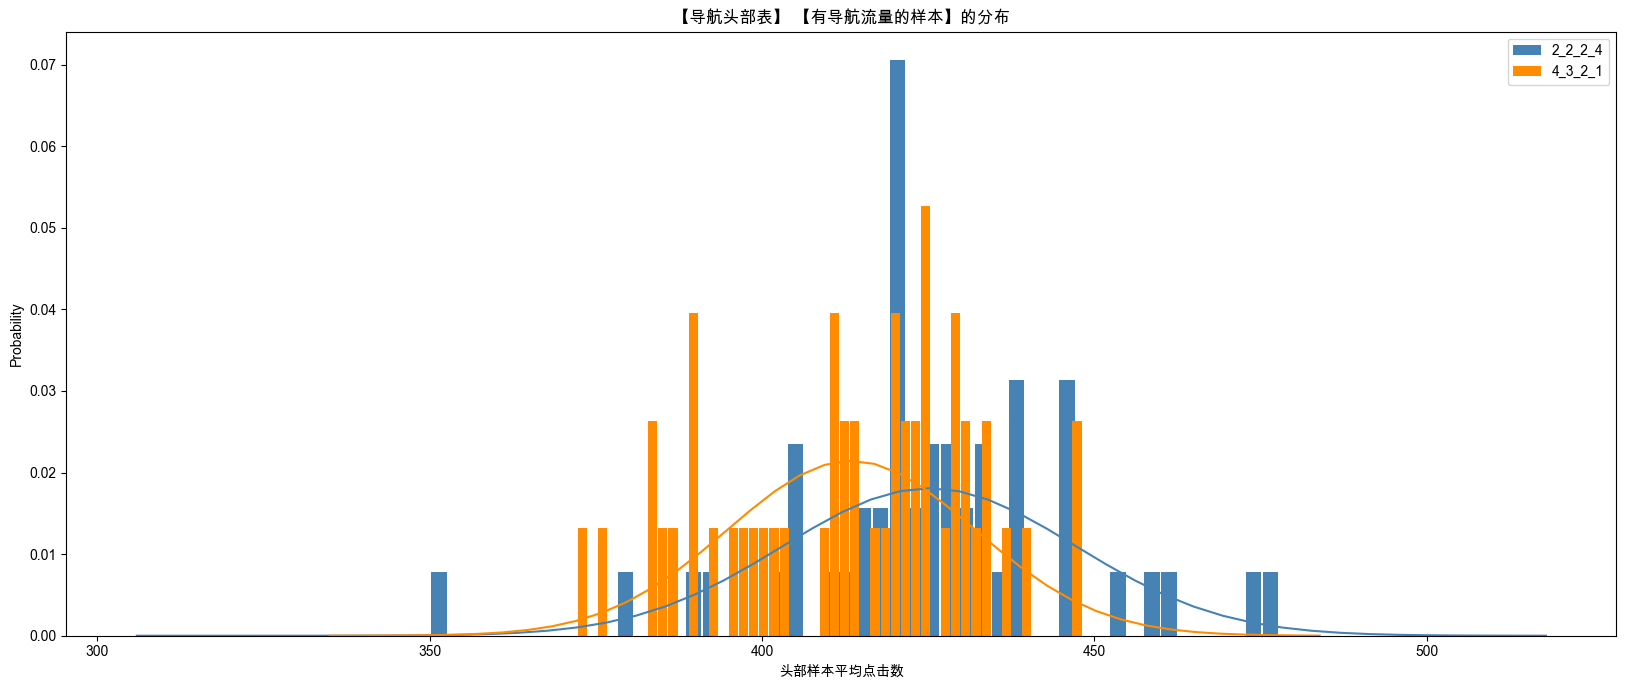

2_2_2_4 | 头部样本平均导航数 sample_size=50 μ=271.97132 σ=20.28127
4_3_2_1 | 头部样本平均导航数 sample_size=50 μ=253.57138 σ=17.34573


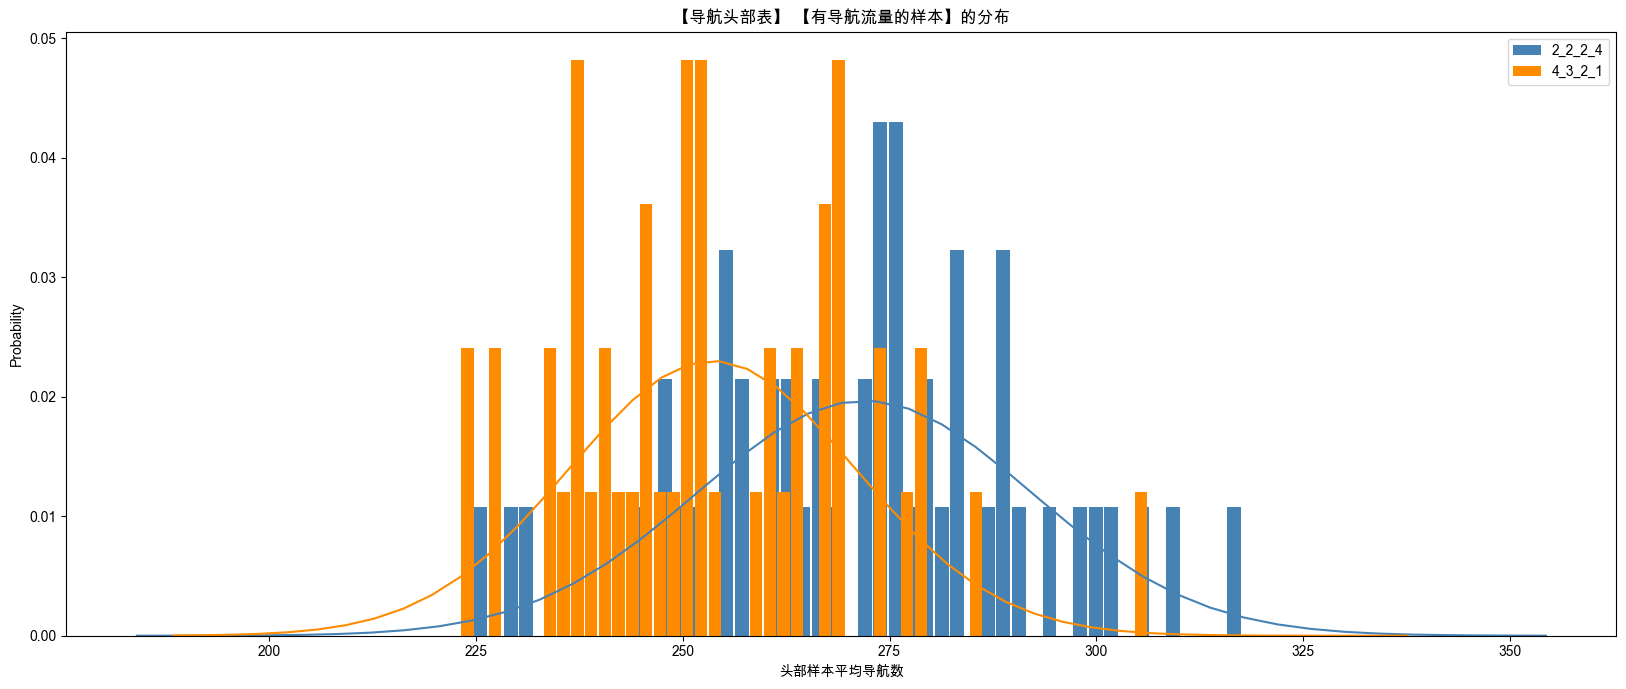

############################## 【导航头部表】 【有导航流量+无导航流量样本】的分布 ##############################
2_2_2_4 | 头部样本/样本总数 sample_size=50 μ=0.03921 σ=0.00122
4_3_2_1 | 头部样本/样本总数 sample_size=50 μ=0.03847 σ=0.00081


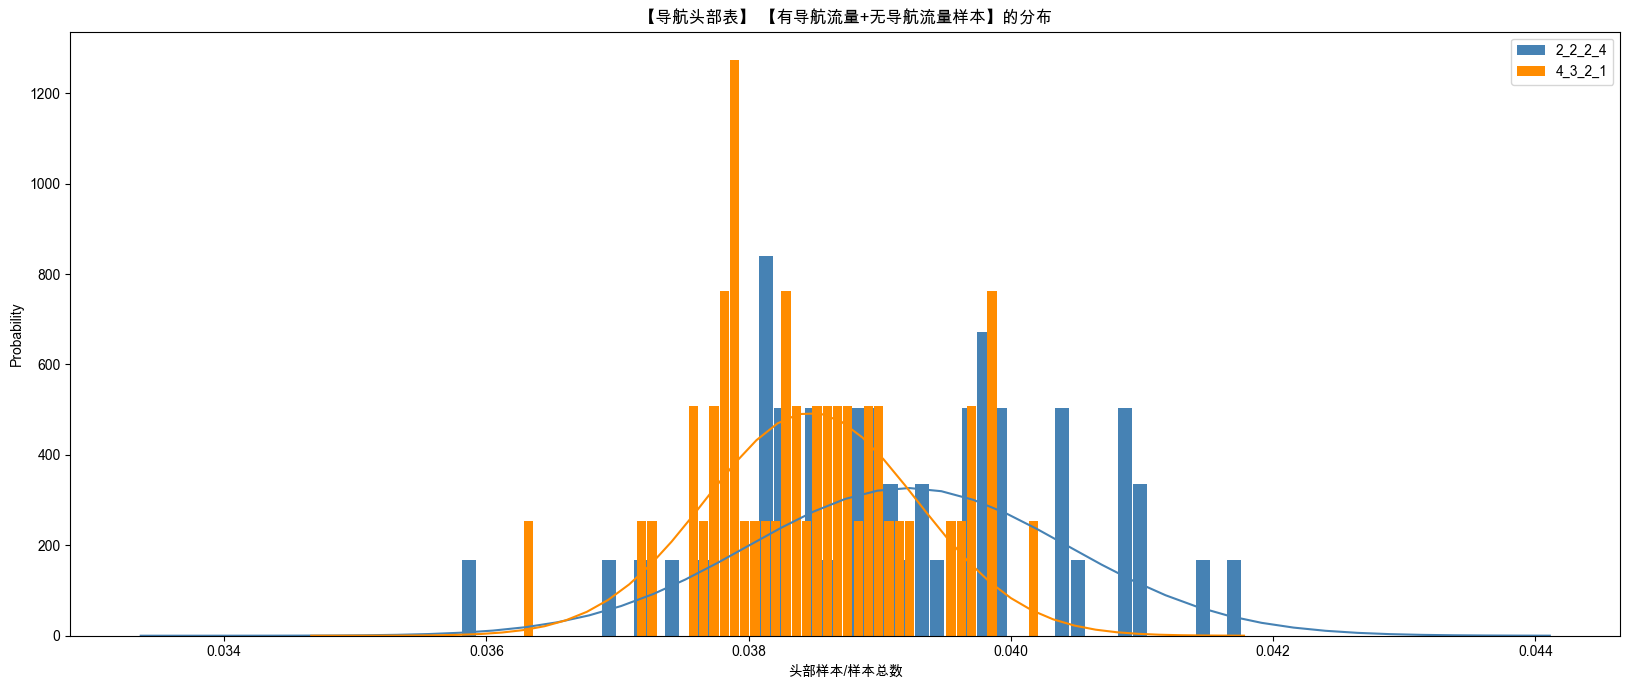

2_2_2_4 | 头部样本平均点击数 sample_size=50 μ=425.16713 σ=22.07476
4_3_2_1 | 头部样本平均点击数 sample_size=50 μ=413.43364 σ=18.61714


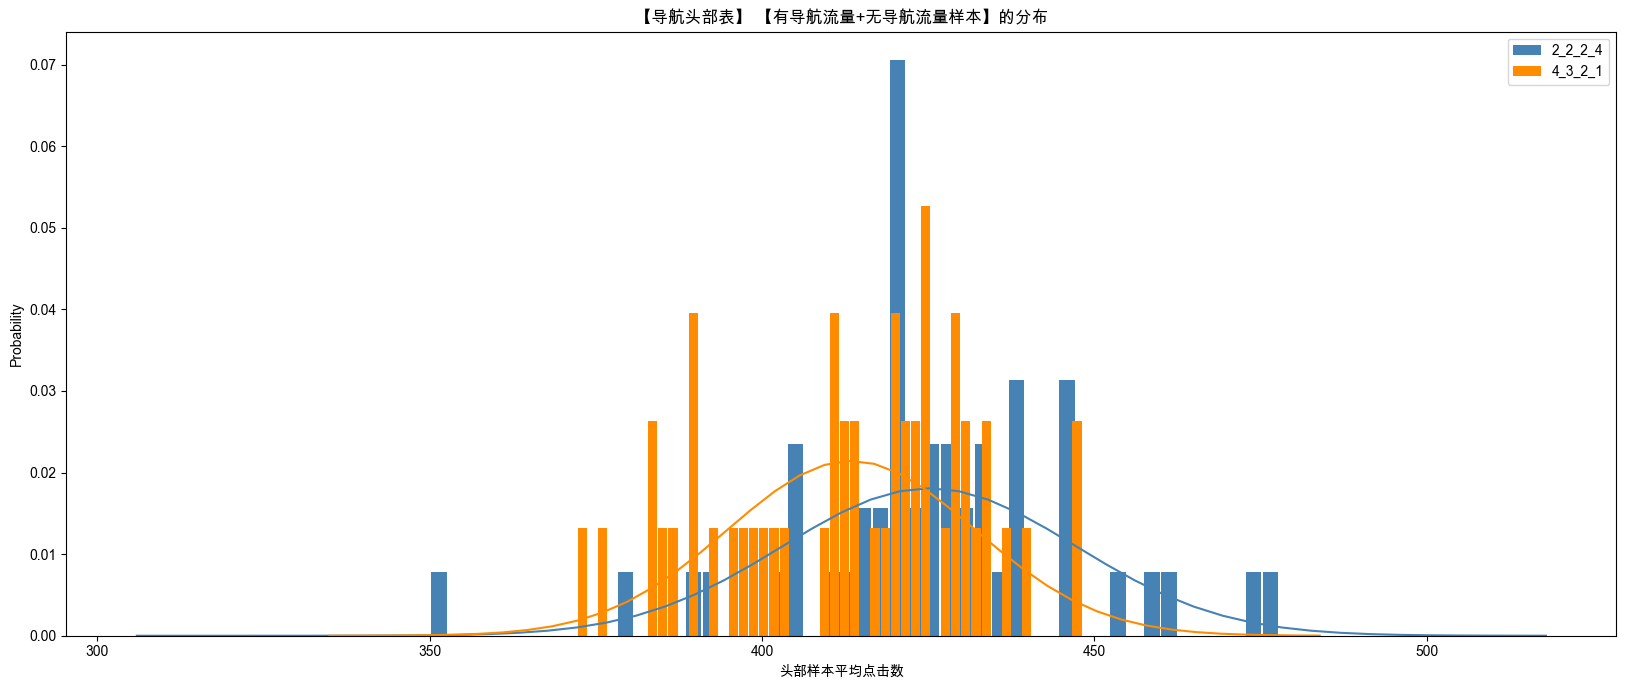

2_2_2_4 | 头部样本平均导航数 sample_size=50 μ=271.97132 σ=20.28127
4_3_2_1 | 头部样本平均导航数 sample_size=50 μ=253.57138 σ=17.34573


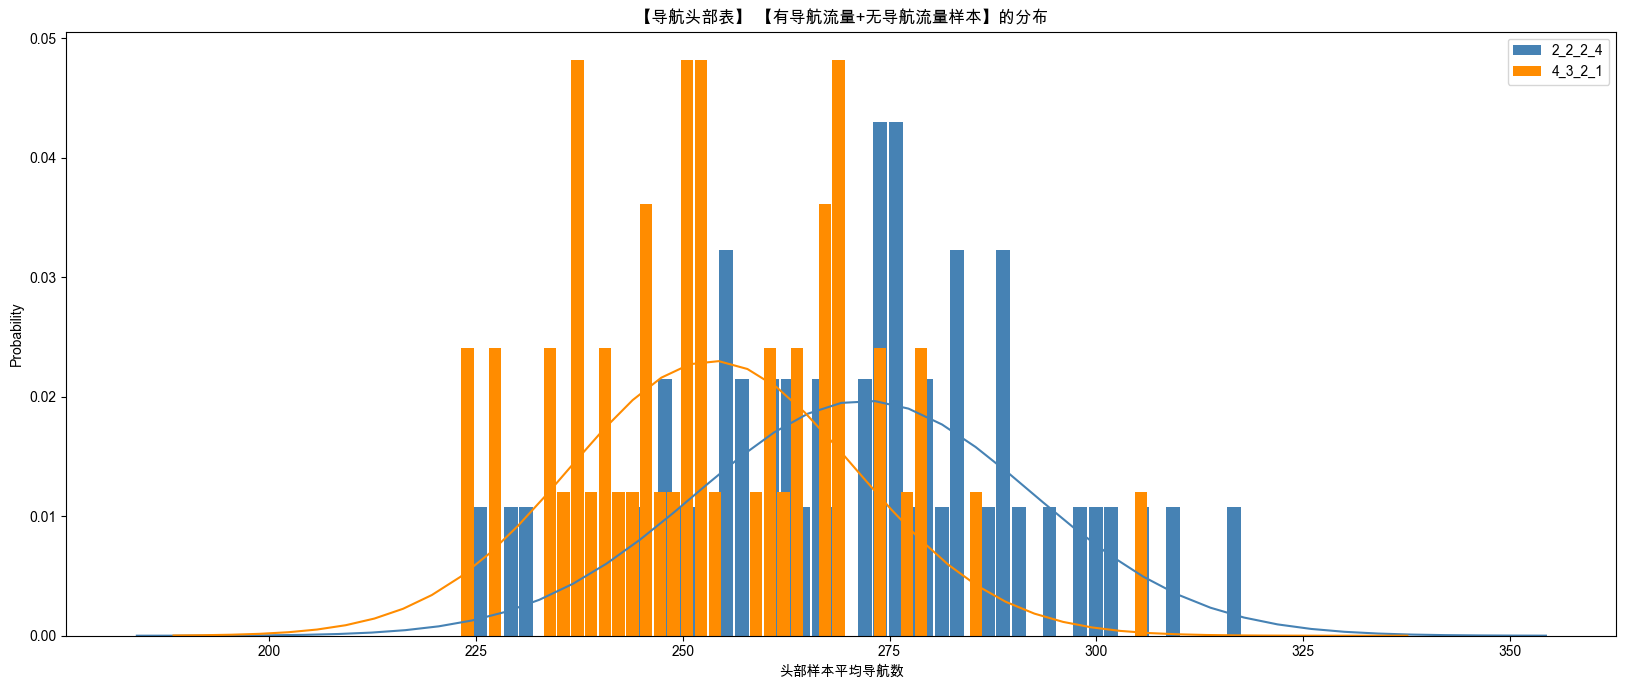

############################## 【点击头部表】 【有导航流量的样本】的分布 ##############################
2_2_2_4 | 头部样本/样本总数 sample_size=50 μ=0.14029 σ=0.00513
4_3_2_1 | 头部样本/样本总数 sample_size=50 μ=0.13875 σ=0.00315


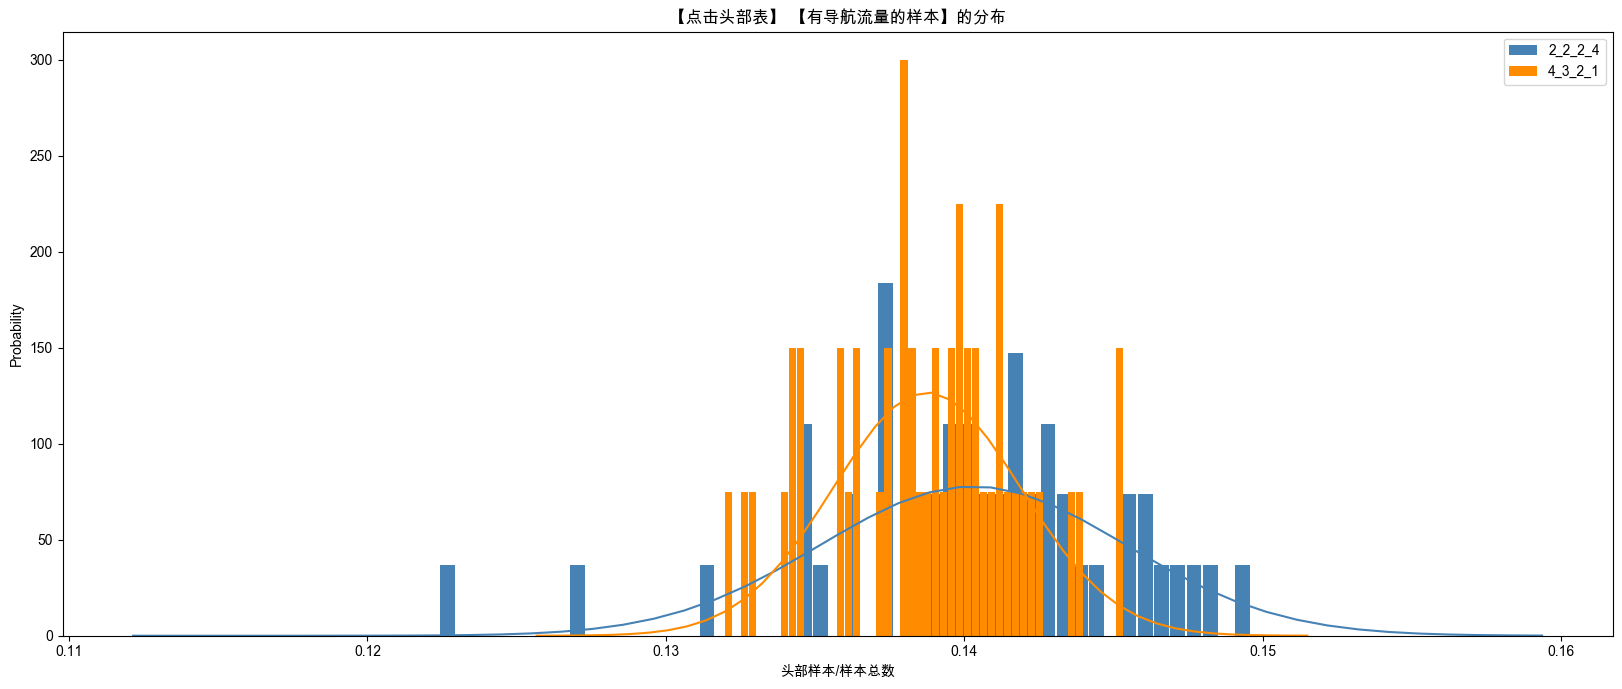

2_2_2_4 | 头部样本平均点击数 sample_size=50 μ=335.98644 σ=12.70911
4_3_2_1 | 头部样本平均点击数 sample_size=50 μ=326.79307 σ=11.8408


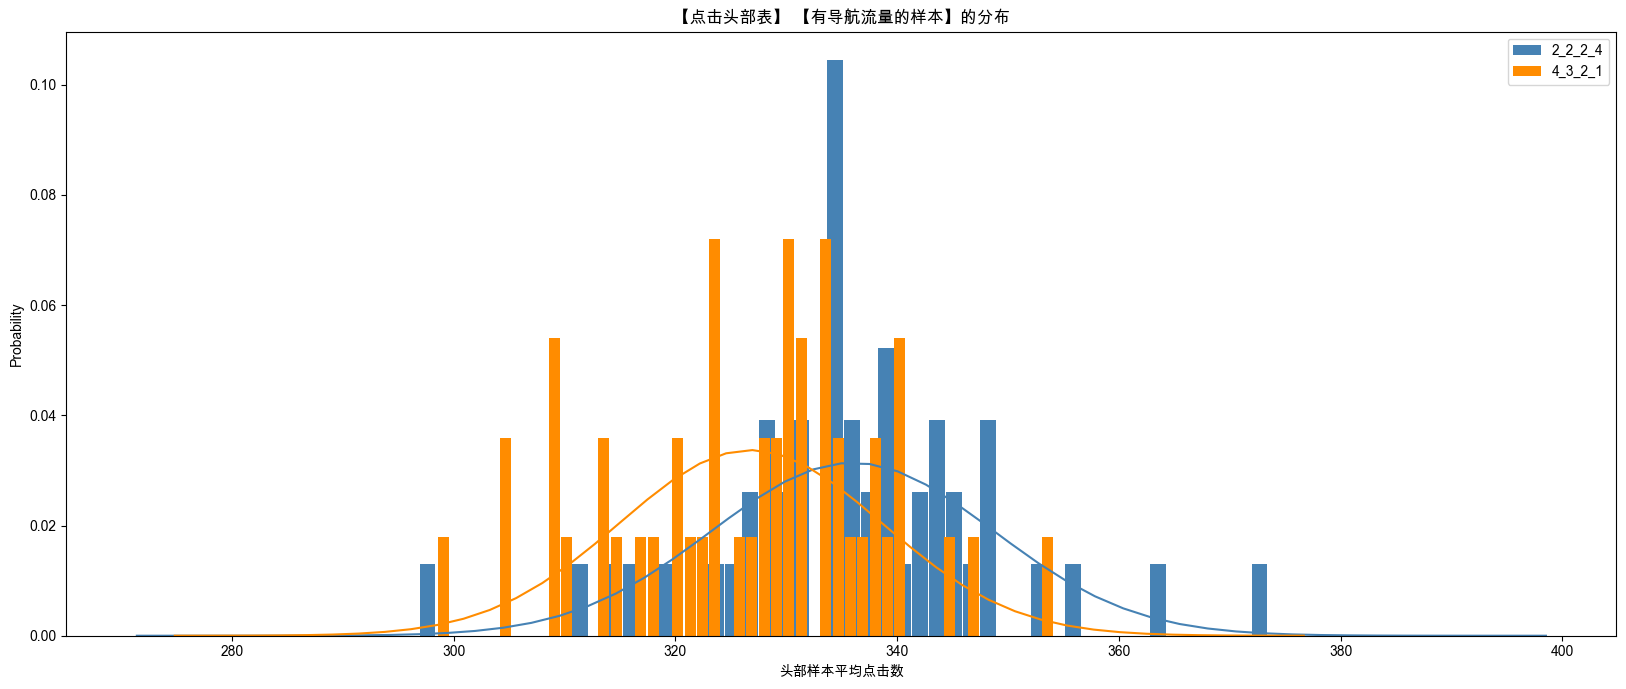

2_2_2_4 | 头部样本平均导航数 sample_size=50 μ=200.98832 σ=15.14055
4_3_2_1 | 头部样本平均导航数 sample_size=50 μ=187.01403 σ=12.75624


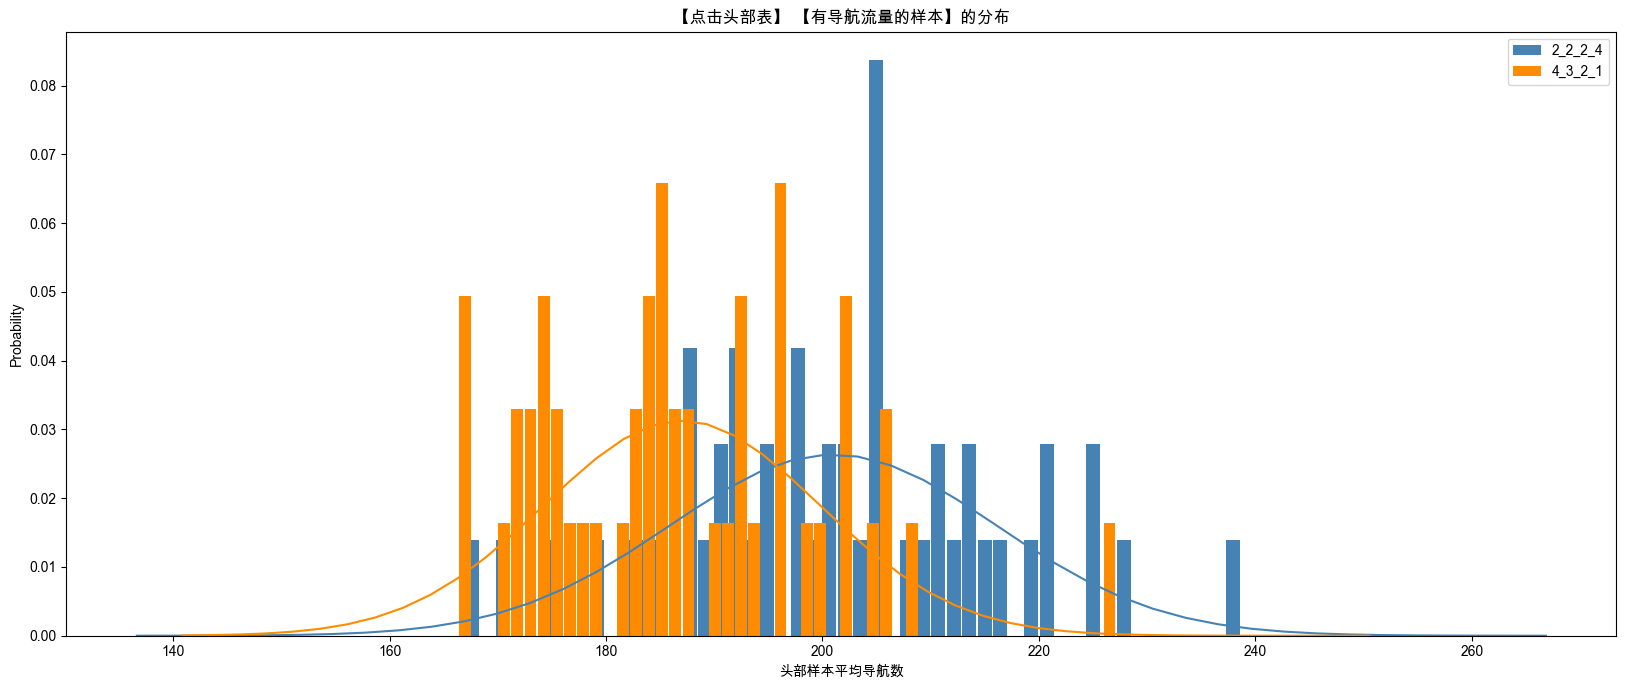

############################## 【点击头部表】 【有导航流量+无导航流量样本】的分布 ##############################
2_2_2_4 | 头部样本/样本总数 sample_size=50 μ=0.0543 σ=0.00195
4_3_2_1 | 头部样本/样本总数 sample_size=50 μ=0.05342 σ=0.00118


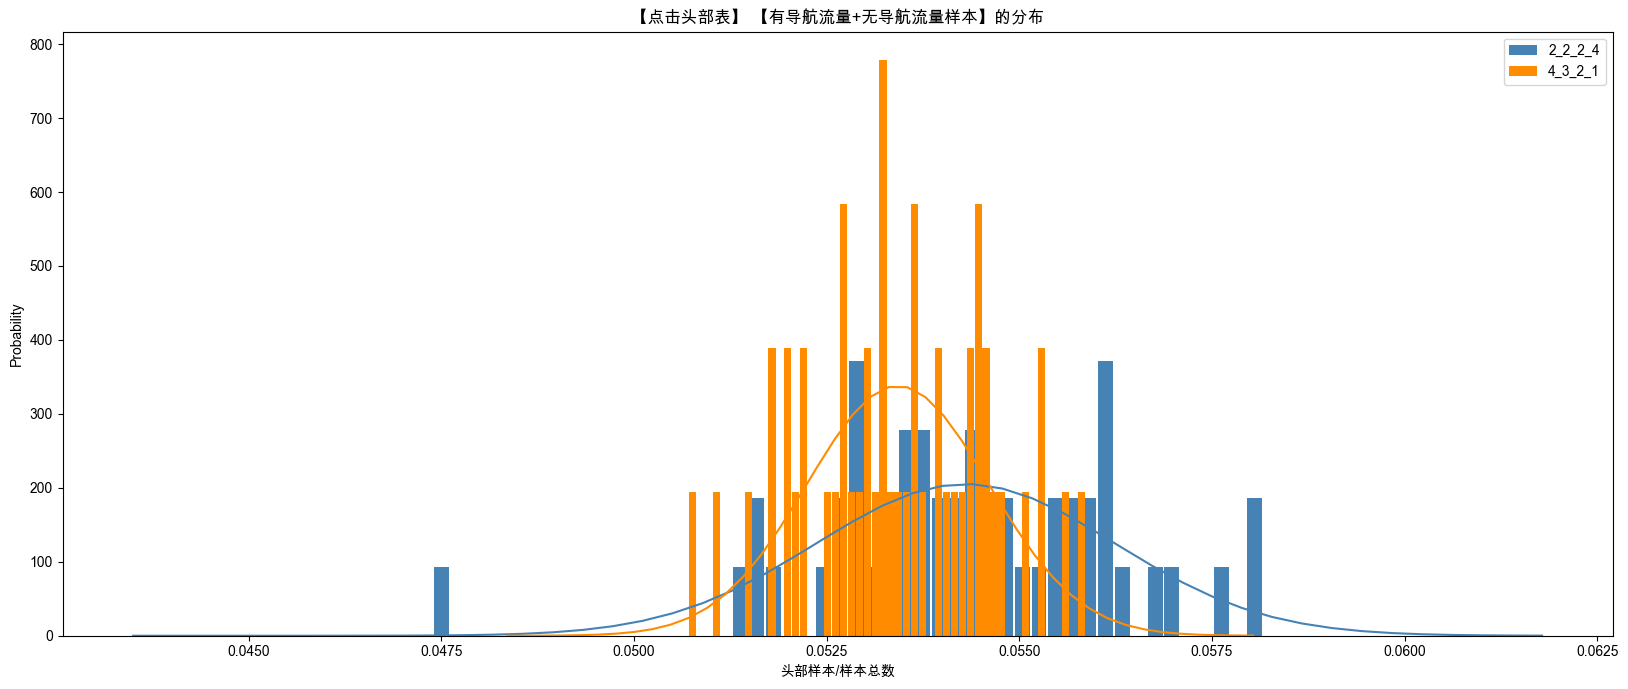

2_2_2_4 | 头部样本平均点击数 sample_size=50 μ=332.4619 σ=12.56794
4_3_2_1 | 头部样本平均点击数 sample_size=50 μ=323.32459 σ=11.67248


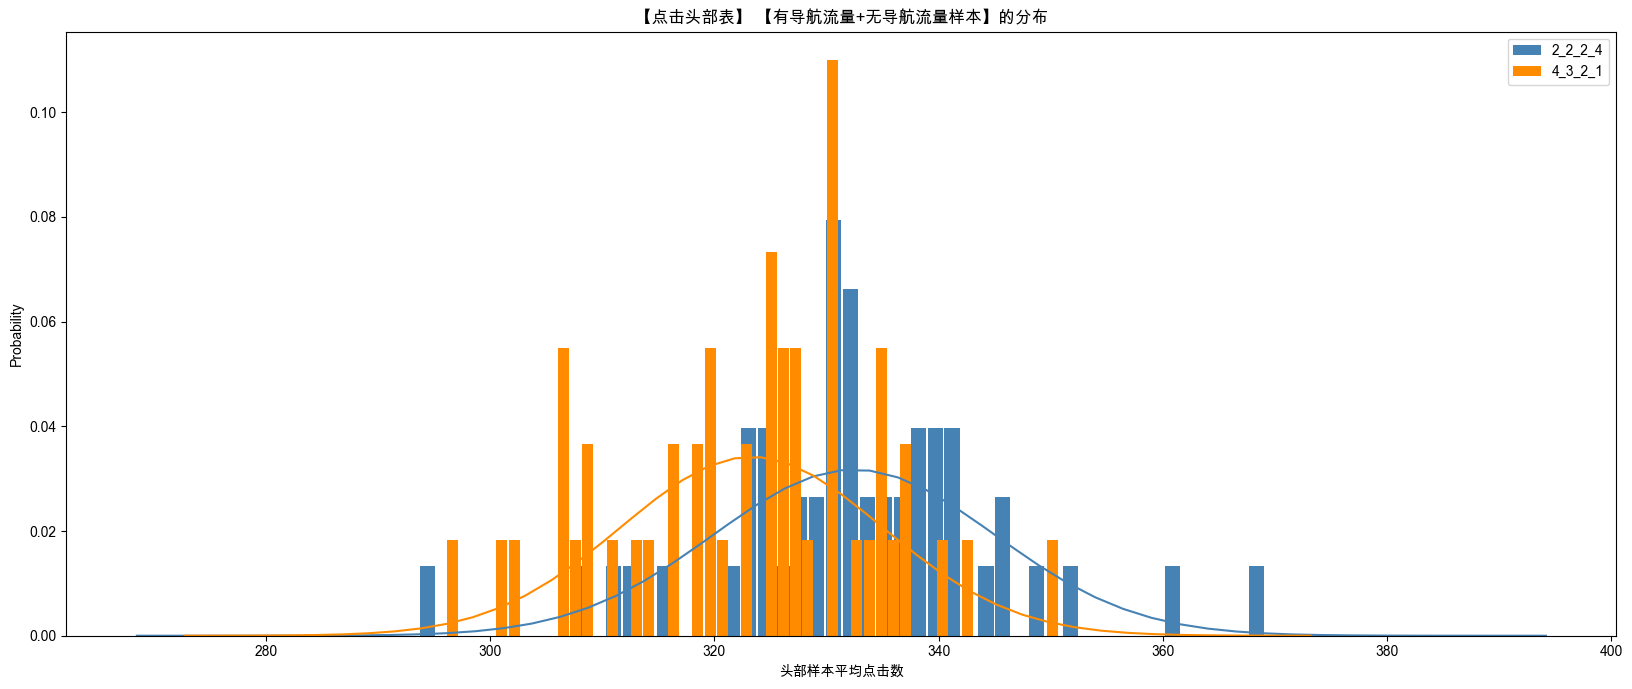

2_2_2_4 | 头部样本平均导航数 sample_size=50 μ=198.102 σ=14.9496
4_3_2_1 | 头部样本平均导航数 sample_size=50 μ=184.34212 σ=12.59601


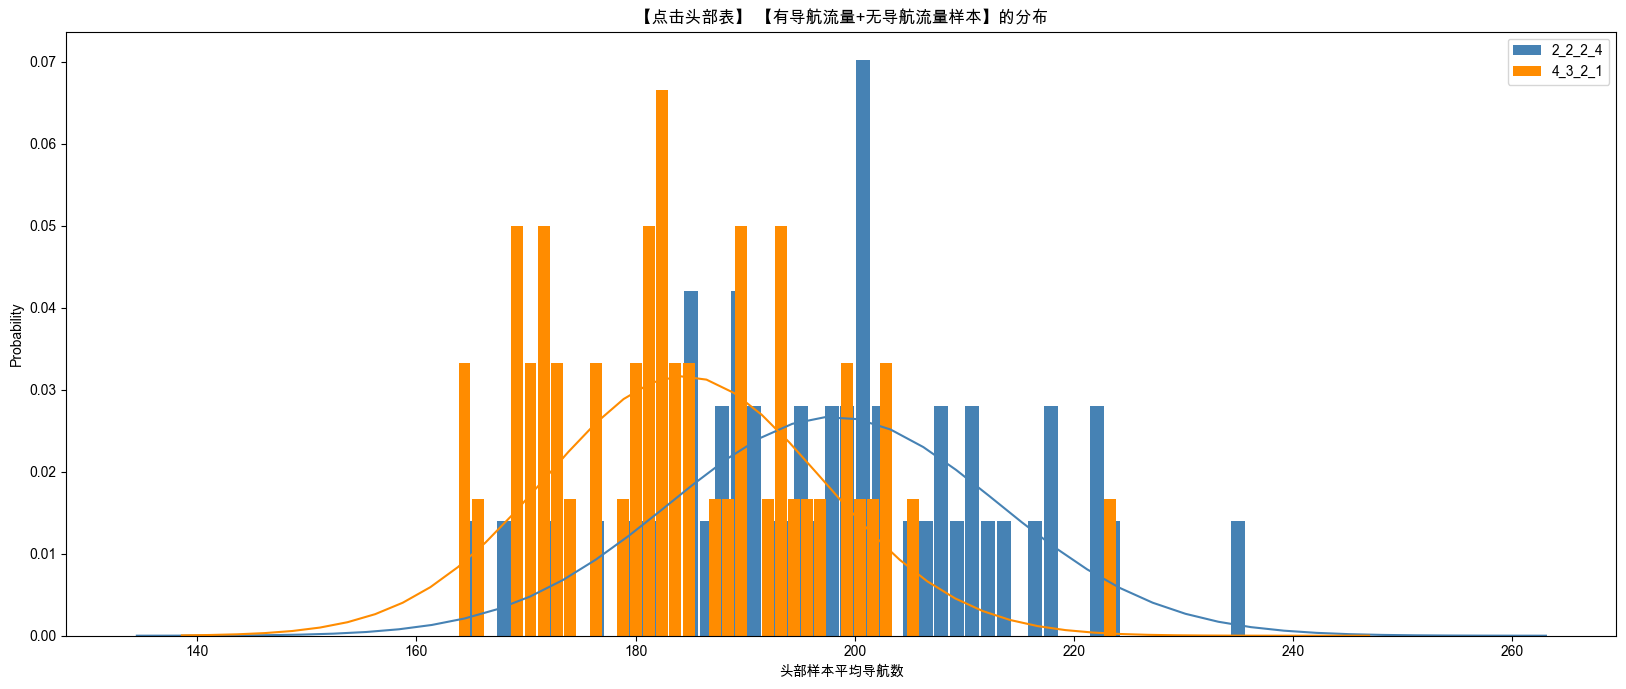

In [108]:


for top_tab in ['nav', 'click']:
    for min_nav_num in ['1', '0']:
        t1 = '导航头部表' if top_tab == 'nav' else '点击头部表'
        t2 = '有导航流量的样本' if min_nav_num == '1' else '有导航流量+无导航流量样本'   
        title = '【{}】 【{}】的分布'.format(t1, t2)
        print('##############################', title, '##############################')
        for key in columns[6:9]:
            color_list = ['SteelBlue', 'DarkOrange']
            fig, ax = plt.subplots(figsize=(20,8),dpi=100)
            for tag in tags:
                color = color_list[0]
                color_list = color_list[1:]
                
                df = df_dict[tag]
                query_str = "top_tab=='{}' & min_nav_num=='{}'".format(top_tab, min_nav_num)
                df1 = df.query(query_str)
                series = df1[key]
                mean = series.mean()
                std = series.std()
                print(tag, '|', key, 'sample_size={}'.format(series.count()), 'μ={}'.format(round(mean,5)), 'σ={}'.format(round(std,5)))

                ####################### 绘制正态分布曲线 ###########################
                plot_normal_distribution(series, ax, title, xlabel=key)
                ####################### 绘制正态分布曲线 ###########################
                #输出
            plt.show()
    
    
    


        

## POI TYPE 统计


In [127]:
df_cate = pd.read_csv('/Users/andyzhuang/git/maps_arch/poi_evaluation/scripts/poi_code_level1.txt',
                  delimiter="\t", header=None, names=['category_code_pre2', 'category'])
df_cate.isnull().any()
df_cate

,category_code_pre2,category
0,0,未知
1,10,美食
2,11,公司企业
3,12,机构团体
4,13,购物
5,14,生活服务
6,16,娱乐休闲
7,18,运动健身
8,19,汽车
9,20,医疗保健


In [145]:
poi_type_columns = ['category_code_pre2', 'num', 'ratio']
path_overall_nav='/Users/andyzhuang/tmp/city_2020030501_test_samp/city_2020030501/overall_nav_poi_category_ratio.csv'
path_overall='/Users/andyzhuang/tmp/city_2020030501_test_samp/city_2020030501/overall_poi_category_ratio.csv'
df_overall_nav = pd.read_csv(path_overall_nav, delimiter="\t", header=None, names=poi_type_columns)[['category_code_pre2', 'ratio']]
df_overall = pd.read_csv(path_overall, delimiter="\t", header=None, names=poi_type_columns)[['category_code_pre2', 'ratio']]

df_poi_type_dict = dict()
tags = ['2_2_2_4', '4_3_2_1']
for tag in tags:
    frames = list()
    base = '/Users/andyzhuang/tmp/city_2020030501_test_samp/city_2020030501_test_samp_{}_weight_*/poi_type_stat_1'.format(tag)
    for path in glob.glob(base):
        df1 = pd.read_csv(path, delimiter="\t", header=None, names=poi_type_columns)
        df1.isnull().any()
#         df1.columns = columns
        frames.append(df1)

    df = pd.concat(frames)
    df_poi_type_dict[tag] = df
df_poi_type_dict['2_2_2_4'] 

df = df_poi_type_dict['2_2_2_4'][['category_code_pre2', 'ratio']]
grouped = df.groupby('category_code_pre2')
a = grouped.describe()
a


ratio                                                    \
                   count      mean       std       min       25%       50%   
category_code_pre2                                                           
0                   36.0  0.000007  0.000003  0.000003  0.000005  0.000006   
10                  40.0  0.122545  0.003352  0.109969  0.121220  0.122559   
11                  40.0  0.061923  0.005718  0.055883  0.058414  0.060249   
12                  40.0  0.034172  0.001743  0.028261  0.033466  0.034095   
13                  40.0  0.169398  0.008095  0.158414  0.164971  0.169260   
14                  40.0  0.102998  0.001887  0.097923  0.101919  0.102982   
16                  40.0  0.036972  0.001100  0.033336  0.036399  0.037112   
18                  40.0  0.011803  0.000388  0.010483  0.011631  0.011787   
19                  40.0  0.050439  0.001589  0.047955  0.049520  0.050237   
20                  40.0  0.034600  0.000664  0.032838  0.034211  0.034526   
21                  40.0  0.032689  0.001801  0.028736  0.031605  0.032505   
22                  40.0  0.007931  0.001572  0.005581  0.006831  0.007574   
23                  40.0  0.004450  0.000479  0.003188  0.004034  0.004458   
24                  40.0  0.032220  0.001287  0.029254  0.031374  0.031898   
25                  40.0  0.025806  0.001398  0.021158  0.025422  0.026136   
26                  40.0  0.019331  0.001591  0.016817  0.018159  0.019305   
27                  40.0  0.023092  0.001404  0.020591  0.021974  0.023283   
28                  40.0  0.147332  0.005423  0.137546  0.142560  0.147547   
80                  40.0  0.082215  0.003333  0.071565  0.081996  0.082317   
99                  40.0  0.000078  0.000011  0.000056  0.000072  0.000076   

                                        
                         75%       max  
category_code_pre2                      
0                   0.000009  0.000013  
10                  0.124387  0.128370  
11                  0.062978  0.085170  
12                  0.035283  0.037633  
13                  0.171391  0.203793  
14                  0.103984  0.107920  
16                  0.037630  0.038661  
18                  0.012025  0.012589  
19                  0.050943  0.055897  
20                  0.035105  0.035779  
21                  0.034004  0.036772  
22                  0.008988  0.011646  
23                  0.004773  0.005349  
24                  0.033269  0.034512  
25                  0.026484  0.028351  
26                  0.019996  0.024163  
27                  0.024006  0.026118  
28                  0.150938  0.158909  
80                  0.084182  0.087456  
99                  0.000087  0.000095

In [146]:
def plot_bar(ax, with_offset, width_l, value, labels, color):
    pass

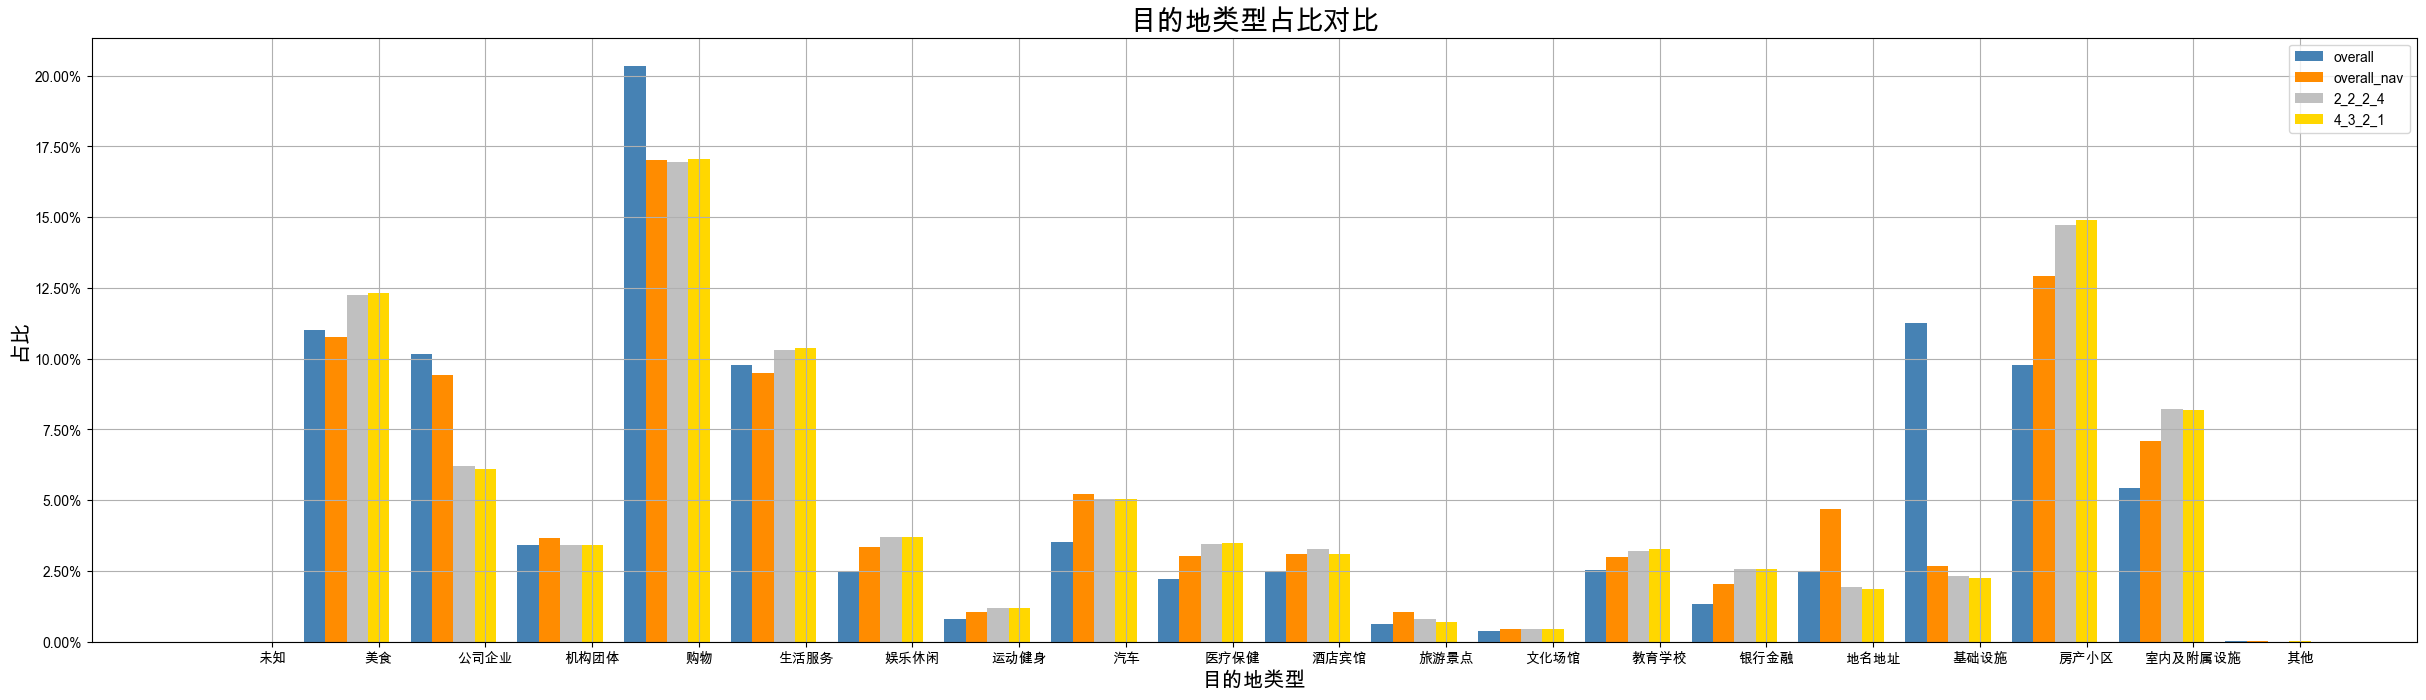

,category_code_pre2,ratio_2_2_2_4,ratio_4_3_2_1,ratio,ratio_overall_nav,category
0,0,0.000007,0.000006,0.000004,0.000005,未知
1,10,0.122545,0.123142,0.110259,0.107489,美食
2,11,0.061923,0.060951,0.101697,0.094070,公司企业
3,12,0.034172,0.034021,0.034219,0.036643,机构团体
4,13,0.169398,0.170475,0.203233,0.170170,购物
5,14,0.102998,0.103871,0.097930,0.094768,生活服务
6,16,0.036972,0.037111,0.024504,0.033587,娱乐休闲
7,18,0.011803,0.011931,0.008035,0.010607,运动健身
8,19,0.050439,0.050348,0.035190,0.052120,汽车
9,20,0.034600,0.034818,0.022016,0.030447,医疗保健


In [160]:
tags = ['2_2_2_4', '4_3_2_1']
# labels = ['未知分类','美食','公司企业','机构团体','购物综合商场','超市','家具家居建材','农贸市场','邮局速递','综合医院','星级酒店','中学','银行','道路名','行政地名','交通设施','道路附属','住宅区','商务楼宇','通行设施']

df_samp = None
prev_tag = None
for tag in tags:
    df = df_poi_type_dict[tag][['category_code_pre2', 'ratio']]
    grouped = df.groupby('category_code_pre2')
    if df_samp is None:
        df_samp = grouped.mean()
    else:
        df_samp = pd.merge(df_samp, grouped.mean(), how='outer', on=['category_code_pre2'],suffixes=('_'+prev_tag, '_'+tag))
    prev_tag = tag    
df_samp = pd.merge(df_samp, df_overall, how='outer', on=['category_code_pre2'],suffixes=('', '_overall'))
df_samp = pd.merge(df_samp, df_overall_nav, how='outer', on=['category_code_pre2'],suffixes=('', '_overall_nav')) 
df_samp = pd.merge(df_samp, df_cate, how='left', on=['category_code_pre2'])

################ 可视化
labels = df_samp['category']
color_list = ['SteelBlue', 'DarkOrange', 'silver', 'gold']
fig,ax =plt.subplots(figsize=(30,8),dpi=100)
width_1 = 0.2
width_offset = 0
for key in ['ratio', 'ratio_overall_nav', 'ratio_2_2_2_4', 'ratio_4_3_2_1']:
    ratio = df_samp[key]
    color = color_list[0]
    color_list = color_list[1:]
    tag = key.replace('ratio_', '')
    tag = 'overall' if tag == 'ratio' else tag
    ax.bar(np.arange(len(ratio)) + width_offset, ratio, width=width_1,tick_label=labels,label = tag, color=color)
    width_offset += width_1
ax.set_ylabel('占比', fontsize=15)
ax.set_xlabel('目的地类型', fontsize=15)
ax.set_title('目的地类型占比对比',fontsize=20, fontweight='bold')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend()
ax.grid()
plt.show()

df_samp
